Preparation of contact pattern matrix and $$\beta_{home}$$

# Transforming The Above Files:
### One should choose the division set for the model via the variable <b>'cell_name'</b> in the <i>indices.py</i> file in the model. The options are :
* 20
* 250
* 870

### In order to run this notebook One should make sure the above files exist:
* Data/division_choice
    * Data/division_choice/'cell_name'/cell2name.xlsx
    * Data/division_choice/'cell_name'/mat_macro_model_df.pickle
    * Data/division_choice/'cell_name'/taz2cell.xlsx
* Data/raw
    * Data/raw/pop2taz.xlsx
    * Data/raw/religion2taz.csv

    * Data/raw/leisure_mtx.csv
    * Data/raw/work_mtx.csv
    * Data/raw/school_mtx.csv

    * Data/raw/secularism_base_home.xlsx
    * Data/raw/haredi_base_home.xlsx
    * Data/raw/arabs_base_home.xlsx

    * Data/raw/taz_home_stay_by_periods.pickle
    
    * Data/raw/Summary_Home_0_TAZ.txt


### This Notebook generates the above files:
* Data/parameters
    - Data/parameters/beta_home.pickle

* Data/demograph
    - Data/demograph/age_dist_area.csv
    - Data/demograph/religion_dis.csv
    - Data/demograph/sick_prop.csv

* Data/base_contact_mtx
    - Data/base_contact_mtx/full_home_mtx.csv
    - Data/base_contact_mtx/full_leisure_mtx_no_school.csv
    - Data/base_contact_mtx/full_leisure_mtx_no_work.csv
    - Data/base_contact_mtx/full_leisure_mtx_routine.csv
    - Data/base_contact_mtx/full_work_mtx_no_school.csv
    - Data/base_contact_mtx/full_work_mtx_no_work.csv
    - Data/base_contact_mtx/full_work_mtx_routine.csv
* Data/stay home
    - Data/stay_home/no_school.csv              
    - Data/stay_home/no_work.csv                
    - Data/stay_home/routine.csv                
    - Data/stay_home/seger_bb.csv
    - Data/stay_home/hundred_meters.csv

# Imports

In [1]:
import numpy as np
import pandas as pd
from matplotlib.patches import Patch
import itertools
import pickle
from matplotlib import pyplot as plt
import datetime
from scipy import optimize
import sys
import os
sys.path.append('../SEIR_full/')
sys.path.append('..')
from SEIR_full.indices import *
%matplotlib inline

# Data Creation

## Consts

In [2]:
cell_name = '20'

## Creating demograph/age_dist_area.csv

In [3]:
pop_dist = pd.read_excel('../Data/raw/pop2taz.xlsx', header=2)

In [4]:
pop_dist.columns

Index(['אזור 2630', ' מודל מקור', 'תכולת אזורי תנועה במודל המקור',
       'כלול באזור תנועה (1250) ', 'סמל ישוב', 'שם היישוב/ ים',
       'אזור סטטיסטי ביישוב', 'פירוט האזור', 'שם ישוב, שכונה, מיתקן או רחובות',
       'שימוש קרקע עיקרי', 'ערכי שימושי קרקע', 'אוכלוסייה', 'Unnamed: 12',
       'Unnamed: 13', 'Unnamed: 14', 'Unnamed: 15', 'גילאים', 'Unnamed: 17',
       'Unnamed: 18', 'Unnamed: 19', 'Unnamed: 20', 'Unnamed: 21',
       'Unnamed: 22', 'Unnamed: 23', 'Unnamed: 24', 'Unnamed: 25',
       'Unnamed: 26', 'Unnamed: 27', 'Unnamed: 28', 'Unnamed: 29',
       'Unnamed: 30', 'Unnamed: 31', 'מקושר ל 1250', 'מקושר ל 250',
       'מקושר ל 33', 'נפה', 'מחוז', 'שטח (מ"ר)'],
      dtype='object')

In [5]:
ages_list = ['Unnamed: '+ str(i) for i in range(17,32)]

pop_dist = pop_dist[['אזור 2630', 'גילאים'] + ages_list]
pop_dist.columns = ['id'] + list(pop_dist.iloc[0,1:])

In [6]:
pop_dist = pop_dist.drop([0, 2631, 2632, 2633])

In [7]:
pop_dist['tot_pop'] = pop_dist.iloc[:, 1:].sum(axis=1)
pop_dist['tot_pop'][pop_dist['tot_pop'] == 0] = 1
pop_dist = pop_dist.iloc[:,1:-1].div(pop_dist['tot_pop'], axis=0).join(pop_dist['id']).join(pop_dist['tot_pop'])
pop_dist['tot_pop'][pop_dist['tot_pop'] == 1] = 0
pop_dist['tot_pop'] = pop_dist['tot_pop']/pop_dist['tot_pop'].sum()
pop_dist.iloc[:,:-2] = pop_dist.iloc[:,:-2].mul(pop_dist['tot_pop'], axis=0)
pop_dist

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,0-4,5-9,10-14,15-19,20-24,25-29,30-34,35-39,40-44,45-49,50-54,55-59,60-64,65-69,70-74,75+,id,tot_pop
1,4.46203e-05,4.73732e-05,5.3682e-05,8.167e-05,4.66849e-05,3.5788e-05,1.50264e-05,1.58293e-05,2.14498e-05,2.13351e-05,2.54645e-05,2.25969e-05,1.51411e-05,5.27643e-06,2.40881e-06,5.39114e-06,1,0.000460
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0.000000
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0.000000
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,0.000000
5,1.23881e-05,1.05529e-05,7.57053e-06,6.19407e-06,4.5882e-06,6.19407e-06,7.91465e-06,1.05529e-05,9.97934e-06,8.60288e-06,6.19407e-06,7.34112e-06,8.71758e-06,1.04382e-05,9.29111e-06,8.14406e-06,5,0.000135
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2626,0.000239275,0.000199472,0.00016724,0.000167699,0.000135008,0.000105185,7.30671e-05,5.9876e-05,5.59761e-05,4.59967e-05,3.06262e-05,1.92704e-05,1.60587e-05,1.06676e-05,8.25876e-06,8.14406e-06,2626,0.001342
2627,0.000137187,0.00012262,0.000113443,0.000110576,8.78641e-05,6.80201e-05,4.64555e-05,4.46203e-05,3.93438e-05,3.48703e-05,1.88116e-05,1.3994e-05,9.1764e-06,5.16173e-06,5.27643e-06,7.68524e-06,2627,0.000865
2628,0.000279536,0.000242945,0.000225625,0.000214154,0.000178252,0.000135925,9.81875e-05,8.06376e-05,7.67377e-05,6.21701e-05,4.06056e-05,2.62675e-05,1.97293e-05,1.23881e-05,1.07823e-05,1.04382e-05,2628,0.001714
2629,0.000222184,0.000217825,0.000191787,0.000182381,0.000193163,0.000192819,0.00019821,0.000188919,0.00019236,0.000187199,0.000162422,0.000129731,0.000114705,8.87817e-05,6.49231e-05,6.53819e-05,2629,0.002593


In [8]:
taz2cell = pd.read_excel('../Data/division_choice/'+ cell_name + '/taz2cell.xlsx')

In [9]:
taz2cell = taz2cell[['taz_id', 'cell_id']]
taz2cell.columns = ['id', 'new_id']

In [10]:
taz2cell

,id,new_id
0,1,2000153
1,2,2000166
2,3,2000164
3,4,2000164
4,5,2000164
...,...,...
2625,2626,2000228
2626,2627,2000228
2627,2628,2000228
2628,2629,2000229


In [11]:
pop_cell = pop_dist.merge(taz2cell, left_on='id', right_on='id')
pop_cell['new_id'] = pop_cell['new_id'].astype(str)
pop_cell.sort_values(by='new_id')

,0-4,5-9,10-14,15-19,20-24,25-29,30-34,35-39,40-44,45-49,50-54,55-59,60-64,65-69,70-74,75+,id,tot_pop,new_id
1547,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1548,0.000000,2000001
1138,0.000125946,0.00012239,0.000110346,0.000105987,8.12112e-05,6.84789e-05,5.70084e-05,5.19614e-05,4.61114e-05,3.81968e-05,2.67263e-05,2.14498e-05,1.55999e-05,8.94699e-06,5.27643e-06,8.25876e-06,1139,0.000894,2000001
1139,5.76966e-05,5.49437e-05,5.4829e-05,5.94172e-05,4.72585e-05,3.67056e-05,2.70704e-05,2.78733e-05,2.83321e-05,2.25969e-05,1.75499e-05,1.31911e-05,9.52052e-06,6.8823e-06,4.12938e-06,4.24409e-06,1140,0.000472,2000001
1140,2.03028e-05,1.97293e-05,1.77793e-05,1.70911e-05,1.30764e-05,1.10117e-05,9.1764e-06,8.37347e-06,7.45583e-06,6.07937e-06,4.24409e-06,3.44115e-06,2.52351e-06,1.37646e-06,8.02935e-07,1.26176e-06,1141,0.000144,2000001
1141,4.92085e-05,4.7832e-05,4.31291e-05,4.14085e-05,3.17733e-05,2.67263e-05,2.22528e-05,2.03028e-05,1.80087e-05,1.49117e-05,1.04382e-05,8.37347e-06,6.07937e-06,3.44115e-06,2.06469e-06,3.21174e-06,1142,0.000349,2000001
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1323,3.73938e-05,2.85616e-05,2.67263e-05,2.55792e-05,3.3838e-05,2.84468e-05,2.47763e-05,1.43381e-05,1.47969e-05,1.66322e-05,1.66322e-05,1.89263e-05,1.77793e-05,1.37646e-05,8.48817e-06,8.71758e-06,1324,0.000335,2000250
1324,2.67263e-05,2.0991e-05,1.91557e-05,1.45675e-05,1.85822e-05,1.83528e-05,1.36499e-05,9.40581e-06,9.40581e-06,8.14406e-06,8.60288e-06,9.52052e-06,1.02087e-05,7.45583e-06,4.5882e-06,5.16173e-06,1325,0.000205,2000250
1326,1.96146e-05,2.21381e-05,1.7894e-05,8.60288e-06,9.97934e-06,8.37347e-06,8.83229e-06,1.02087e-05,1.02087e-05,7.68524e-06,5.04702e-06,3.55586e-06,6.07937e-06,4.81761e-06,1.72058e-06,1.26176e-06,1327,0.000146,2000250
1321,2.67263e-05,2.0991e-05,1.91557e-05,1.45675e-05,1.85822e-05,1.83528e-05,1.36499e-05,9.40581e-06,9.40581e-06,8.14406e-06,8.60288e-06,9.52052e-06,1.02087e-05,7.45583e-06,4.5882e-06,5.16173e-06,1322,0.000205,2000250


In [12]:
def make_pop(df):
    df = df.iloc[:,0:-2]
    return df.sum(axis=0)

In [13]:
pop_cell = pop_cell.groupby(by='new_id').apply(lambda df: make_pop(df))

In [14]:
pop_cell

,0-4,5-9,10-14,15-19,20-24,25-29,30-34,35-39,40-44,45-49,50-54,55-59,60-64,65-69,70-74,75+,id
new_id,,,,,,,,,,,,,,,,,
2000001,0.000667,0.000689,0.000611,0.000496,0.000380,0.000332,0.000340,0.000345,0.000337,0.000267,0.000181,0.000150,0.000124,0.000102,0.000067,0.000073,19215.0
2000002,0.000997,0.001007,0.000962,0.000895,0.000707,0.000606,0.000476,0.000504,0.000451,0.000359,0.000295,0.000232,0.000164,0.000116,0.000092,0.000105,17042.0
2000003,0.001051,0.001049,0.000971,0.000935,0.000779,0.000623,0.000481,0.000459,0.000406,0.000355,0.000291,0.000216,0.000147,0.000102,0.000076,0.000078,11845.0
2000004,0.000251,0.000242,0.000223,0.000222,0.000213,0.000205,0.000145,0.000139,0.000119,0.000112,0.000108,0.000097,0.000069,0.000056,0.000047,0.000067,4370.0
2000005,0.000384,0.000401,0.000391,0.000369,0.000375,0.000322,0.000252,0.000237,0.000220,0.000203,0.000176,0.000147,0.000122,0.000109,0.000088,0.000118,3264.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2000246,0.000750,0.000725,0.000570,0.000484,0.000439,0.000362,0.000376,0.000297,0.000231,0.000191,0.000171,0.000157,0.000143,0.000095,0.000059,0.000076,113180.0
2000247,0.000724,0.000647,0.000464,0.000278,0.000346,0.000307,0.000305,0.000235,0.000165,0.000131,0.000104,0.000096,0.000085,0.000069,0.000035,0.000031,55610.0
2000248,0.000269,0.000276,0.000247,0.000186,0.000178,0.000147,0.000153,0.000152,0.000149,0.000122,0.000096,0.000104,0.000107,0.000096,0.000050,0.000042,11078.0


In [15]:
A

{0: '0-4',
 1: '5-9',
 2: '10-19',
 3: '20-29',
 4: '30-39',
 5: '40-49',
 6: '50-59',
 7: '60-69',
 8: '70+'}

In [16]:
pop_cell['10-19'] = pop_cell['10-14'] + pop_cell['15-19']
pop_cell['20-29'] = pop_cell['20-24'] + pop_cell['25-29']
pop_cell['30-39'] = pop_cell['30-34'] + pop_cell['35-39']
pop_cell['40-49'] = pop_cell['40-44'] + pop_cell['45-49']
pop_cell['50-59'] = pop_cell['50-54'] + pop_cell['55-59']
pop_cell['60-69'] = pop_cell['60-64'] + pop_cell['65-69']
pop_cell['70+'] = pop_cell['70-74'] + pop_cell['75+']
pop_cell = pop_cell[list(A.values())]
pop_cell

,0-4,5-9,10-19,20-29,30-39,40-49,50-59,60-69,70+
new_id,,,,,,,,,
2000001,0.000667,0.000689,0.001106,0.000712,0.000686,0.000605,0.000331,0.000226,0.000140
2000002,0.000997,0.001007,0.001857,0.001312,0.000979,0.000809,0.000527,0.000280,0.000198
2000003,0.001051,0.001049,0.001906,0.001402,0.000940,0.000761,0.000507,0.000249,0.000154
2000004,0.000251,0.000242,0.000445,0.000418,0.000284,0.000231,0.000205,0.000125,0.000114
2000005,0.000384,0.000401,0.000760,0.000698,0.000489,0.000423,0.000323,0.000232,0.000206
...,...,...,...,...,...,...,...,...,...
2000246,0.000750,0.000725,0.001054,0.000800,0.000673,0.000422,0.000327,0.000238,0.000135
2000247,0.000724,0.000647,0.000742,0.000653,0.000539,0.000297,0.000201,0.000154,0.000066
2000248,0.000269,0.000276,0.000434,0.000325,0.000306,0.000271,0.000199,0.000203,0.000092


In [17]:
pop_cell = pop_cell / pop_cell.sum().sum()

In [18]:
pop_cell.reset_index(inplace=True)
pop_cell.columns = ['cell_id'] + list(A.values())

In [19]:
pop_cell

,cell_id,0-4,5-9,10-19,20-29,30-39,40-49,50-59,60-69,70+
0,2000001,0.000667,0.000689,0.001106,0.000712,0.000686,0.000605,0.000331,0.000226,0.000140
1,2000002,0.000997,0.001007,0.001857,0.001312,0.000979,0.000809,0.000527,0.000280,0.000198
2,2000003,0.001051,0.001049,0.001906,0.001402,0.000940,0.000761,0.000507,0.000249,0.000154
3,2000004,0.000251,0.000242,0.000445,0.000418,0.000284,0.000231,0.000205,0.000125,0.000114
4,2000005,0.000384,0.000401,0.000760,0.000698,0.000489,0.000423,0.000323,0.000232,0.000206
...,...,...,...,...,...,...,...,...,...,...
245,2000246,0.000750,0.000725,0.001054,0.000800,0.000673,0.000422,0.000327,0.000238,0.000135
246,2000247,0.000724,0.000647,0.000742,0.000653,0.000539,0.000297,0.000201,0.000154,0.000066
247,2000248,0.000269,0.000276,0.000434,0.000325,0.000306,0.000271,0.000199,0.000203,0.000092
248,2000249,0.000253,0.000276,0.000414,0.000299,0.000306,0.000313,0.000223,0.000179,0.000107


In [20]:
pop_cell.to_csv('../Data/demograph/age_dist_area.csv')

## Creating demograph/religion_dis.csv

In [21]:
religion2taz = pd.read_csv('../Data/raw/religion2taz.csv')
religion2taz.sort_values(by='taz_id', inplace=True)
religion2taz.columns = ['id', 'Orthodox', 'Druze', 'Other', 'Sacular', 'Muslim', 'Christian']
religion2taz['Jewish'] = religion2taz['Orthodox'] + religion2taz['Sacular']
religion2taz

,id,Orthodox,Druze,Other,Sacular,Muslim,Christian,Jewish
0,1,0.029482,0.0,0.0,0.970310,0.000207,0.0,0.999793
1,2,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000
2,3,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000
3,4,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000
4,5,0.010413,0.0,0.0,0.915182,0.074406,0.0,0.925594
...,...,...,...,...,...,...,...,...
2545,2626,0.000000,0.0,0.0,0.000303,0.999697,0.0,0.000303
2546,2627,0.000000,0.0,0.0,0.002635,0.997365,0.0,0.002635
2547,2628,0.000000,0.0,0.0,0.002553,0.997447,0.0,0.002553
2548,2629,0.001288,0.0,0.0,0.940031,0.058681,0.0,0.941319


In [22]:
taz2cell = pd.read_excel('../Data/division_choice/'+ cell_name + '/taz2cell.xlsx')

In [23]:
taz2cell = taz2cell[['taz_id', 'cell_id']]
taz2cell.columns = ['id', 'new_id']
taz2cell

,id,new_id
0,1,2000153
1,2,2000166
2,3,2000164
3,4,2000164
4,5,2000164
...,...,...
2625,2626,2000228
2626,2627,2000228
2627,2628,2000228
2628,2629,2000229


In [24]:
religion2taz = religion2taz.merge(taz2cell, on='id')
religion2taz['new_id'] = religion2taz['new_id'].astype(str)
religion2taz.sort_values(by='new_id', inplace=True)
religion2taz

,id,Orthodox,Druze,Other,Sacular,Muslim,Christian,Jewish,new_id
1547,1548,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,2000001
1138,1139,0.283936,0.0,0.0,0.706577,0.009487,0.0,0.990513,2000001
1139,1140,0.281287,0.0,0.0,0.709320,0.009392,0.0,0.990608,2000001
1140,1141,0.282081,0.0,0.0,0.708416,0.009503,0.0,0.990497,2000001
1141,1142,0.282939,0.0,0.0,0.707490,0.009571,0.0,0.990429,2000001
...,...,...,...,...,...,...,...,...,...
1323,1324,0.037842,0.0,0.0,0.922728,0.039430,0.0,0.960570,2000250
1324,1325,0.094000,0.0,0.0,0.906000,0.000000,0.0,1.000000,2000250
1326,1327,0.000000,0.0,0.0,0.997000,0.003000,0.0,0.997000,2000250
1321,1322,0.093796,0.0,0.0,0.906204,0.000000,0.0,1.000000,2000250


In [25]:
pop_dist = pd.read_excel('../Data/raw/pop2taz.xlsx', header=2)
ages_list = ['Unnamed: '+ str(i) for i in range(17,32)]

pop_dist = pop_dist[['אזור 2630', 'גילאים'] + ages_list]
pop_dist.columns = ['id'] + list(pop_dist.iloc[0,1:])
pop_dist = pop_dist.drop([0, 2631, 2632, 2633])
pop_dist['tot_pop'] = pop_dist.iloc[:, 1:].sum(axis=1)
pop_dist['tot_pop'][pop_dist['tot_pop'] == 0] = 1
pop_dist = pop_dist.iloc[:,1:-1].div(pop_dist['tot_pop'], axis=0).join(pop_dist['id']).join(pop_dist['tot_pop'])
pop_dist['tot_pop'][pop_dist['tot_pop'] == 1] = 0
pop_dist['tot_pop'] = pop_dist['tot_pop']/pop_dist['tot_pop'].sum()
pop_dist.iloc[:,:-2] = pop_dist.iloc[:,:-2].mul(pop_dist['tot_pop'], axis=0)
pop_dist = pop_dist[['id', 'tot_pop']]
pop_dist

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


,id,tot_pop
1,1,0.000460
2,2,0.000000
3,3,0.000000
4,4,0.000000
5,5,0.000135
...,...,...
2626,2626,0.001342
2627,2627,0.000865
2628,2628,0.001714
2629,2629,0.002593


In [26]:
religion2taz = religion2taz.merge(pop_dist, on='id')
religion2taz.sort_values(by='id', inplace=True)
religion2taz

,id,Orthodox,Druze,Other,Sacular,Muslim,Christian,Jewish,new_id,tot_pop
1545,1,0.029482,0.0,0.0,0.970310,0.000207,0.0,0.999793,2000153,0.000460
1665,2,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,2000166,0.000000
1654,3,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,2000164,0.000000
1656,4,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,2000164,0.000000
1655,5,0.010413,0.0,0.0,0.915182,0.074406,0.0,0.925594,2000164,0.000135
...,...,...,...,...,...,...,...,...,...,...
2259,2626,0.000000,0.0,0.0,0.000303,0.999697,0.0,0.000303,2000228,0.001342
2260,2627,0.000000,0.0,0.0,0.002635,0.997365,0.0,0.002635,2000228,0.000865
2261,2628,0.000000,0.0,0.0,0.002553,0.997447,0.0,0.002553,2000228,0.001714
2264,2629,0.001288,0.0,0.0,0.940031,0.058681,0.0,0.941319,2000229,0.002593


In [27]:
religion2taz.sort_values(by='new_id').head(20)

,id,Orthodox,Druze,Other,Sacular,Muslim,Christian,Jewish,new_id,tot_pop
0,1548,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,2000001,0.000000
1,1139,0.283936,0.0,0.0,0.706577,0.009487,0.0,0.990513,2000001,0.000894
2,1140,0.281287,0.0,0.0,0.709320,0.009392,0.0,0.990608,2000001,0.000472
3,1141,0.282081,0.0,0.0,0.708416,0.009503,0.0,0.990497,2000001,0.000144
4,1142,0.282939,0.0,0.0,0.707490,0.009571,0.0,0.990429,2000001,0.000349
5,1143,0.026737,0.0,0.0,0.972986,0.000277,0.0,0.999723,2000001,0.000182
6,1216,0.104691,0.0,0.0,0.892832,0.002477,0.0,0.997523,2000001,0.001195
7,1549,0.283936,0.0,0.0,0.706577,0.009487,0.0,0.990513,2000001,0.000765
8,1218,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,2000001,0.000000
9,1550,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,2000001,0.000000


In [28]:
def make_pop(df):
    df = df.iloc[:,1:8].multiply(df['tot_pop'], axis='index')
    return df.sum(axis=0)

In [29]:
religion2taz = religion2taz.groupby(by='new_id').apply(lambda df: make_pop(df))

In [30]:
religion2taz

,Orthodox,Druze,Other,Sacular,Muslim,Christian,Jewish
new_id,,,,,,,
2000001,0.001051,0.0,0.0,0.004077,3.251037e-05,0.0,0.005128
2000002,0.002261,0.0,0.0,0.005630,7.552481e-05,0.0,0.007891
2000003,0.002256,0.0,0.0,0.005687,7.570999e-05,0.0,0.007943
2000004,0.000663,0.0,0.0,0.001630,2.215683e-05,0.0,0.002292
2000005,0.001112,0.0,0.0,0.002765,3.712027e-05,0.0,0.003878
...,...,...,...,...,...,...,...
2000246,0.000748,0.0,0.0,0.004347,2.882478e-05,0.0,0.005095
2000247,0.000533,0.0,0.0,0.003422,6.935850e-05,0.0,0.003954
2000248,0.000367,0.0,0.0,0.002007,4.376076e-07,0.0,0.002374


In [31]:
tmp = religion2taz[['Druze', 'Other', 'Muslim', 'Christian', 'Jewish']].sum(axis=1)
tmp.loc[tmp == 0] = 1
religion2taz = religion2taz.divide(tmp, axis=0)
religion2taz

,Orthodox,Druze,Other,Sacular,Muslim,Christian,Jewish
new_id,,,,,,,
2000001,0.203647,0.0,0.0,0.790054,0.006299,0.0,0.993701
2000002,0.283772,0.0,0.0,0.706747,0.009481,0.0,0.990519
2000003,0.281337,0.0,0.0,0.709221,0.009442,0.0,0.990558
2000004,0.286254,0.0,0.0,0.704173,0.009573,0.0,0.990427
2000005,0.284137,0.0,0.0,0.706381,0.009482,0.0,0.990518
...,...,...,...,...,...,...,...
2000246,0.146026,0.0,0.0,0.848349,0.005626,0.0,0.994374
2000247,0.132441,0.0,0.0,0.850322,0.017237,0.0,0.982763
2000248,0.154740,0.0,0.0,0.845076,0.000184,0.0,0.999816


In [32]:
religion2taz.reset_index(inplace=True)

In [33]:
religion2taz.columns = ['cell_id', 'Orthodox', 'Druze', 'Other', 'Sacular', 'Muslim', 'Christian', 'Jewish']
religion2taz

,cell_id,Orthodox,Druze,Other,Sacular,Muslim,Christian,Jewish
0,2000001,0.203647,0.0,0.0,0.790054,0.006299,0.0,0.993701
1,2000002,0.283772,0.0,0.0,0.706747,0.009481,0.0,0.990519
2,2000003,0.281337,0.0,0.0,0.709221,0.009442,0.0,0.990558
3,2000004,0.286254,0.0,0.0,0.704173,0.009573,0.0,0.990427
4,2000005,0.284137,0.0,0.0,0.706381,0.009482,0.0,0.990518
...,...,...,...,...,...,...,...,...
245,2000246,0.146026,0.0,0.0,0.848349,0.005626,0.0,0.994374
246,2000247,0.132441,0.0,0.0,0.850322,0.017237,0.0,0.982763
247,2000248,0.154740,0.0,0.0,0.845076,0.000184,0.0,0.999816
248,2000249,0.055004,0.0,0.0,0.928742,0.016254,0.0,0.983746


In [34]:
religion2taz.to_csv('../Data/demograph/religion_dis.csv')

## Creating stay_home/ALL

In [35]:
home = pd.read_csv('../Data/raw/Summary_Home_0_TAZ.txt', delimiter='\t', encoding='utf-16')
home.columns = ['date', 'taz_id', 'stay', 'out']
home['date'] = pd.to_datetime(home['date'], dayfirst=True)
home['stay'] = home['stay'].apply(lambda x: x.replace(',','')).astype(int)
home['out'] = home['out'].apply(lambda x: x.replace(',','')).astype(int)
home['total'] = home['stay'] + home['out']
home['out_pct'] = home['out'] / home['total']
# home['city_parsed'] = home.city.apply(lambda x: x[:-7] if ('חרדים' in x or 'ערבים' in x) else x)
home.head()

,date,taz_id,stay,out,total,out_pct
0,2020-02-01,1,2249,1742,3991,0.436482
1,2020-02-01,5,1226,646,1872,0.345085
2,2020-02-01,6,789,365,1154,0.316291
3,2020-02-01,8,2780,1869,4649,0.402022
4,2020-02-01,9,4032,2788,6820,0.408798


In [36]:
home.describe()

,taz_id,stay,out,total,out_pct
count,137678.000000,137678.000000,137678.000000,137678.000000,137678.000000
mean,1286.067338,2698.334360,1894.839255,4593.173615,0.429082
std,783.451484,2710.537599,1865.464227,4128.529670,0.172477
min,1.000000,1.000000,1.000000,2.000000,0.000612
25%,601.000000,1034.000000,688.000000,2013.000000,0.299796
50%,1226.500000,1985.000000,1360.000000,3543.500000,0.442424
75%,2009.000000,3476.000000,2502.000000,5946.000000,0.565511
max,2630.000000,42522.000000,27568.000000,56052.000000,0.996865


In [37]:
taz2cell = pd.read_excel('../Data/division_choice/'+ cell_name + '/taz2cell.xlsx')
taz2cell.head()

,taz_id,cell_id
0,1,2000153
1,2,2000166
2,3,2000164
3,4,2000164
4,5,2000164


In [38]:
home = home.merge(taz2cell, on='taz_id')
set(home['cell_id'])

{2000001,
 2000002,
 2000003,
 2000004,
 2000005,
 2000006,
 2000007,
 2000008,
 2000009,
 2000010,
 2000011,
 2000012,
 2000013,
 2000014,
 2000015,
 2000016,
 2000017,
 2000019,
 2000020,
 2000021,
 2000022,
 2000023,
 2000024,
 2000025,
 2000027,
 2000029,
 2000030,
 2000031,
 2000032,
 2000033,
 2000034,
 2000035,
 2000036,
 2000037,
 2000038,
 2000039,
 2000040,
 2000041,
 2000042,
 2000043,
 2000044,
 2000045,
 2000046,
 2000047,
 2000048,
 2000049,
 2000050,
 2000051,
 2000052,
 2000053,
 2000055,
 2000056,
 2000057,
 2000058,
 2000059,
 2000060,
 2000061,
 2000062,
 2000063,
 2000064,
 2000065,
 2000066,
 2000067,
 2000068,
 2000069,
 2000070,
 2000071,
 2000072,
 2000073,
 2000074,
 2000075,
 2000076,
 2000077,
 2000078,
 2000079,
 2000080,
 2000081,
 2000082,
 2000083,
 2000084,
 2000085,
 2000086,
 2000087,
 2000088,
 2000089,
 2000090,
 2000091,
 2000092,
 2000093,
 2000094,
 2000095,
 2000096,
 2000097,
 2000098,
 2000099,
 2000100,
 2000101,
 2000102,
 2000103,
 2000104,


In [39]:
home

,date,taz_id,stay,out,total,out_pct,cell_id
0,2020-02-01,1,2249,1742,3991,0.436482,2000153
1,2020-02-02,1,1058,2932,3990,0.734837,2000153
2,2020-02-03,1,1144,2847,3991,0.713355,2000153
3,2020-02-04,1,1180,2810,3990,0.704261,2000153
4,2020-02-05,1,1112,2878,3990,0.721303,2000153
...,...,...,...,...,...,...,...
137673,2020-04-09,2630,6295,1230,7525,0.163455,2000230
137674,2020-04-10,2630,4825,2700,7525,0.358804,2000230
137675,2020-04-11,2630,5990,1535,7525,0.203987,2000230
137676,2020-04-12,2630,4130,3395,7525,0.451163,2000230


In [230]:
len(set(home['taz_id']))

1886

In [40]:
home_cell = home.groupby(['date', 'cell_id'])[['stay', 'out', 'total']].sum().reset_index()
home_cell['out_pct'] = home_cell['out'] / home_cell['total']
home_cell

,date,cell_id,stay,out,total,out_pct
0,2020-02-01,2000001,34776,27125,61901,0.438200
1,2020-02-01,2000002,66850,49210,116060,0.424005
2,2020-02-01,2000003,70220,39335,109555,0.359043
3,2020-02-01,2000004,13275,6520,19795,0.329376
4,2020-02-01,2000005,12885,3790,16675,0.227286
...,...,...,...,...,...,...
17734,2020-04-13,2000246,105234,61556,166790,0.369063
17735,2020-04-13,2000247,84335,43553,127888,0.340556
17736,2020-04-13,2000248,20310,13903,34213,0.406366
17737,2020-04-13,2000249,20589,12987,33576,0.386794


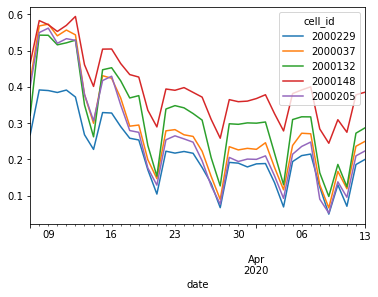

In [41]:
pivoted = pd.pivot_table(home_cell, index='date', columns='cell_id', values='out_pct')
pivoted[pivoted.index >= '2020-03-07'][np.random.choice(pivoted.columns, 5)].plot()

In [42]:
def robust_max(srs, n=3):
    sort = sorted(srs)
    return np.mean(sort[-n:])

def robust_min(srs, n=3):
    sort = sorted(srs)
    return np.mean(sort[:n])

global_max = pivoted.apply(robust_max)
global_min = pivoted.apply(robust_min)
# global_min, global_max = 0,1
span = global_max - global_min
relative_rate = pivoted.apply(lambda row: (row - global_min) / span, axis=1)

In [43]:
def weighted_std(values, weights):
    average = np.average(values, weights=weights)
    variance = np.average((values-average)**2, weights=weights)
    return np.sqrt(variance)

def avg_by_dates(df, from_date, to_date, weights=None):
    filtered = df[(df.index >= from_date) & (df.index <= to_date)]
    if weights is None:
        return filtered.describe().T[['mean','std','min','max']]
    
    weights = pd.Series(weights)
    stats = filtered.describe().T[['min','max']]
    stats['mean'] = filtered.apply(lambda col: np.average(col, weights=weights))
    stats['std'] = filtered.apply(lambda col: weighted_std(col, weights=weights))
    return stats

In [44]:
result = dict()
result['routine'] = avg_by_dates(relative_rate, '2020-02-02', '2020-02-29')
result['no_school'] = avg_by_dates(relative_rate, '2020-03-14', '2020-03-16', 
                         weights={'2020-03-14': 2/7, '2020-03-15': 2.5/7, '2020-03-16': 2.5/7})
result['no_work'] = avg_by_dates(relative_rate, '2020-03-17', '2020-03-25', 
                       weights={i:1/14 if i.day in [17,18,24,25] else 1/7
                                  for i in pd.date_range('2020-03-17', '2020-03-25')})
result['hundred_meters'] = avg_by_dates(relative_rate, '2020-03-26', '2020-04-02', 
                              weights={i:1/14 if i.day in [26,2] else 1/7
                                       for i in pd.date_range('2020-03-26', '2020-04-02')})
result['seger_bb'] = avg_by_dates(relative_rate, '2020-04-03', '2020-04-06', 
                         weights={i:5/14 if i.day in [5,6] else 1/7
                                  for i in pd.date_range('2020-04-03', '2020-04-06')})

In [45]:
# save
try:
    os.mkdir('../Data/stay_home')
except:
    pass
result['routine'].to_csv('../Data/stay_home/routine.csv')
result['no_school'].to_csv('../Data/stay_home/no_school.csv')
result['no_work'].to_csv('../Data/stay_home/no_work.csv')
result['hundred_meters'].to_csv('../Data/stay_home/hundred_meters.csv')
result['seger_bb'].to_csv('../Data/stay_home/seger_bb.csv')

## Creating demograph/sick_pop.csv

In [46]:
taz2sick = pd.read_csv('../Data/sick/taz2sick.csv')
taz2sick.head()

,taz_id,cases_prop
0,1,0.099284
1,2,0.099284
2,3,0.099284
3,4,0.099284
4,5,0.099284


In [47]:
taz2cell = pd.read_excel('../Data/division_choice/'+ cell_name + '/taz2cell.xlsx')
taz2cell.head()

,taz_id,cell_id
0,1,2000153
1,2,2000166
2,3,2000164
3,4,2000164
4,5,2000164


In [48]:
pop_dist = pd.read_excel('../Data/raw/pop2taz.xlsx', header=2)
ages_list = ['Unnamed: '+ str(i) for i in range(17,32)]

pop_dist = pop_dist[['אזור 2630', 'גילאים'] + ages_list]
pop_dist.columns = ['id'] + list(pop_dist.iloc[0,1:])
pop_dist = pop_dist.drop([0, 2631, 2632, 2633])
pop_dist['tot_pop'] = pop_dist.iloc[:, 1:].sum(axis=1)
pop_dist['tot_pop'][pop_dist['tot_pop'] == 0] = 1
pop_dist = pop_dist.iloc[:,1:-1].div(pop_dist['tot_pop'], axis=0).join(pop_dist['id']).join(pop_dist['tot_pop'])
pop_dist['tot_pop'][pop_dist['tot_pop'] == 1] = 0
pop_dist['tot_pop'] = pop_dist['tot_pop']/pop_dist['tot_pop'].sum()
pop_dist.iloc[:,:-2] = pop_dist.iloc[:,:-2].mul(pop_dist['tot_pop'], axis=0)
pop_dist = pop_dist[['id', 'tot_pop']]
pop_dist.head()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


,id,tot_pop
1,1,0.000460
2,2,0.000000
3,3,0.000000
4,4,0.000000
5,5,0.000135


In [49]:
taz2sick = taz2sick.merge(taz2cell, on='taz_id')
taz2sick.head()

,taz_id,cases_prop,cell_id
0,1,0.099284,2000153
1,2,0.099284,2000166
2,3,0.099284,2000164
3,4,0.099284,2000164
4,5,0.099284,2000164


In [50]:
taz2sick = taz2sick.merge(pop_dist, left_on='taz_id', right_on='id')
taz2sick.head()

,taz_id,cases_prop,cell_id,id,tot_pop
0,1,0.099284,2000153,1,0.000460
1,2,0.099284,2000166,2,0.000000
2,3,0.099284,2000164,3,0.000000
3,4,0.099284,2000164,4,0.000000
4,5,0.099284,2000164,5,0.000135


In [51]:
taz2sick['cases_prop'] = taz2sick['cases_prop'] * taz2sick['tot_pop']

In [52]:
def wheighted_average(df):
    tot = df['tot_pop'].sum()
    return (df['cases_prop'].sum() / tot)

taz2sick = taz2sick.groupby(by='cell_id')[['cases_prop', 'tot_pop']].apply(wheighted_average)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in double_scalars
  This is separate from the ipykernel package so we can avoid doing imports until


In [53]:
taz2sick.name='cases_prop'

In [54]:
taz2sick

cell_id
2000001    0.137496
2000002    0.137496
2000003    0.137496
2000004    0.137496
2000005    0.137496
             ...   
2000246    0.083930
2000247    0.083930
2000248    0.083930
2000249    0.083930
2000250    0.083930
Name: cases_prop, Length: 250, dtype: float64

In [55]:
taz2sick.to_csv('../Data/demograph/sick_prop.csv')

# Data Loading

In [197]:
# import data:
with (open('../Data/division_choice/'+ cell_name + '/mat_macro_model_df.pickle', 'rb')) as openfile:
    OD_dict = pickle.load(openfile)

base_leisure = pd.read_csv('../Data/raw/leisure_mtx.csv',index_col=0)
base_work = pd.read_csv('../Data/raw/work_mtx.csv',index_col=0)
base_school = pd.read_csv('../Data/raw/school_mtx.csv',index_col=0)

age_dist_area = pd.read_csv('../Data/demograph/age_dist_area.csv',index_col=0)
stay_home_idx_school =  pd.read_csv('../Data/stay_home/no_school.csv',index_col=0)
stay_home_idx_school.index = stay_home_idx_school.index.astype(str)
stay_home_idx_work =  pd.read_csv('../Data/stay_home/no_work.csv',index_col=0)
stay_home_idx_work.index = stay_home_idx_work.index.astype(str)
stay_home_idx_routine =  pd.read_csv('../Data/stay_home/routine.csv',index_col=0)
stay_home_idx_routine.index = stay_home_idx_routine.index.astype(str)
religion_dist = pd.read_csv('../Data/demograph/religion_dis.csv',index_col=0)


In [198]:
# fix_shahaf_bug
if cell_name=='250':
    if len(str(OD_dict[list(OD_dict.keys())[0]].columns[0]))==6:
        for k in OD_dict.keys():
            OD_dict[k].columns = pd.Index(G.values())
    if len(str(OD_dict[list(OD_dict.keys())[0]].index[0]))==6:
        for k in OD_dict.keys():
            OD_dict[k].index = pd.Index(G.values())

In [199]:
home_secularism = pd.read_excel('../Data/raw/secularism_base_home.xlsx',index_col=0)
home_haredi = pd.read_excel('../Data/raw/haredi_base_home.xlsx',index_col=0)
home_arabs = pd.read_excel('../Data/raw/arabs_base_home.xlsx',index_col=0)

In [200]:
OD_dict.keys()

dict_keys([('no_work', 0), ('no_work', 1), ('no_work', 2), ('no_100_meters', 0), ('no_100_meters', 1), ('no_100_meters', 2), ('no_bb', 0), ('no_bb', 1), ('no_bb', 2), ('routine', 0), ('routine', 1), ('routine', 2), ('no_school', 0), ('no_school', 1), ('no_school', 2)])

In [201]:
age_dist_area

,cell_id,0-4,5-9,10-19,20-29,30-39,40-49,50-59,60-69,70+
0,2000001,0.000667,0.000689,0.001106,0.000712,0.000686,0.000605,0.000331,0.000226,0.000140
1,2000002,0.000997,0.001007,0.001857,0.001312,0.000979,0.000809,0.000527,0.000280,0.000198
2,2000003,0.001051,0.001049,0.001906,0.001402,0.000940,0.000761,0.000507,0.000249,0.000154
3,2000004,0.000251,0.000242,0.000445,0.000418,0.000284,0.000231,0.000205,0.000125,0.000114
4,2000005,0.000384,0.000401,0.000760,0.000698,0.000489,0.000423,0.000323,0.000232,0.000206
...,...,...,...,...,...,...,...,...,...,...
245,2000246,0.000750,0.000725,0.001054,0.000800,0.000673,0.000422,0.000327,0.000238,0.000135
246,2000247,0.000724,0.000647,0.000742,0.000653,0.000539,0.000297,0.000201,0.000154,0.000066
247,2000248,0.000269,0.000276,0.000434,0.000325,0.000306,0.000271,0.000199,0.000203,0.000092
248,2000249,0.000253,0.000276,0.000414,0.000299,0.000306,0.000313,0.000223,0.000179,0.000107


In [202]:
base_leisure

,0-4,5-9,10-19,20-29,30-39,40-49,50-59,60-69,70+
0-4,1.910947,0.785434,0.605625,0.947981,1.217311,0.539321,0.526174,0.327925,0.136674
5-9,0.855218,3.058522,1.270115,0.586938,0.994774,0.548865,0.307890,0.281533,0.096498
10-19,0.188896,0.833542,5.118978,0.980886,0.664389,0.573172,0.223943,0.129148,0.077123
20-29,0.216756,0.165483,1.147046,2.721855,1.030819,0.491379,0.301705,0.088583,0.054323
30-39,0.263324,0.231474,0.380568,0.938731,1.367406,0.614261,0.391434,0.205911,0.073415
40-49,0.098300,0.127266,0.312787,0.458589,0.688429,0.540939,0.255728,0.131058,0.066109
50-59,0.086537,0.105663,0.236436,0.604374,0.589119,0.457537,0.457947,0.236600,0.077892
60-69,0.072166,0.081541,0.124618,0.379717,0.528686,0.365015,0.373055,0.358650,0.143989
70+,0.035686,0.043422,0.112453,0.160497,0.271909,0.236009,0.190299,0.271175,0.190983


In [203]:
OD_dict['routine', 1].index

Index(['2000001', '2000002', '2000003', '2000004', '2000005', '2000006',
       '2000007', '2000008', '2000009', '2000010',
       ...
       '2000241', '2000242', '2000243', '2000244', '2000245', '2000246',
       '2000247', '2000248', '2000249', '2000250'],
      dtype='object', length=250)

In [204]:
stay_home_idx_work

,min,max,mean,std
cell_id,,,,
2000001,0.109416,0.498332,0.315718,0.115956
2000002,0.218919,0.595180,0.363290,0.119344
2000003,0.172393,0.585095,0.368057,0.129016
2000004,0.194695,0.522013,0.344760,0.105922
2000005,0.160374,0.525782,0.325068,0.122345
...,...,...,...,...
2000246,0.153166,0.525155,0.306825,0.111168
2000247,0.227741,0.555174,0.344410,0.116510
2000248,0.112864,0.561009,0.340342,0.132776


In [205]:
MI = {i: group for i, group in enumerate(itertools.product(A.values(), G.values(),  A.values()))}

In [206]:
MI

{0: ('0-4', '2000001', '0-4'),
 1: ('0-4', '2000001', '5-9'),
 2: ('0-4', '2000001', '10-19'),
 3: ('0-4', '2000001', '20-29'),
 4: ('0-4', '2000001', '30-39'),
 5: ('0-4', '2000001', '40-49'),
 6: ('0-4', '2000001', '50-59'),
 7: ('0-4', '2000001', '60-69'),
 8: ('0-4', '2000001', '70+'),
 9: ('0-4', '2000002', '0-4'),
 10: ('0-4', '2000002', '5-9'),
 11: ('0-4', '2000002', '10-19'),
 12: ('0-4', '2000002', '20-29'),
 13: ('0-4', '2000002', '30-39'),
 14: ('0-4', '2000002', '40-49'),
 15: ('0-4', '2000002', '50-59'),
 16: ('0-4', '2000002', '60-69'),
 17: ('0-4', '2000002', '70+'),
 18: ('0-4', '2000003', '0-4'),
 19: ('0-4', '2000003', '5-9'),
 20: ('0-4', '2000003', '10-19'),
 21: ('0-4', '2000003', '20-29'),
 22: ('0-4', '2000003', '30-39'),
 23: ('0-4', '2000003', '40-49'),
 24: ('0-4', '2000003', '50-59'),
 25: ('0-4', '2000003', '60-69'),
 26: ('0-4', '2000003', '70+'),
 27: ('0-4', '2000004', '0-4'),
 28: ('0-4', '2000004', '5-9'),
 29: ('0-4', '2000004', '10-19'),
 30: ('0-4',

# Processing stay home index

In [207]:
span = stay_home_idx_routine['max'] - stay_home_idx_work['min']
span

cell_id
2000001    0.914236
2000002    0.801933
2000003    0.840731
2000004    0.840853
2000005    0.866017
             ...   
2000246    0.888532
2000247    0.784437
2000248    0.892920
2000249    0.894746
2000250    0.866666
Length: 243, dtype: float64

In [208]:
stay_home_idx_work['percent_idx'] = 1 - ((stay_home_idx_routine['max'] - stay_home_idx_work['mean'])/span)
stay_home_idx_school['percent_idx'] = 1 - ((stay_home_idx_routine['max'] - stay_home_idx_school['mean'])/span)

In [209]:
stay_home_idx_work

,min,max,mean,std,percent_idx
cell_id,,,,,
2000001,0.109416,0.498332,0.315718,0.115956,0.225655
2000002,0.218919,0.595180,0.363290,0.119344,0.180030
2000003,0.172393,0.585095,0.368057,0.129016,0.232731
2000004,0.194695,0.522013,0.344760,0.105922,0.178467
2000005,0.160374,0.525782,0.325068,0.122345,0.190175
...,...,...,...,...,...
2000246,0.153166,0.525155,0.306825,0.111168,0.172937
2000247,0.227741,0.555174,0.344410,0.116510,0.148729
2000248,0.112864,0.561009,0.340342,0.132776,0.254757


In [210]:
stay_home_idx_school

,min,max,mean,std,percent_idx
cell_id,,,,,
2000001,0.303776,0.570785,0.491247,0.118629,0.417651
2000002,0.418316,0.654096,0.585934,0.106015,0.457663
2000003,0.422826,0.666932,0.592517,0.107464,0.499713
2000004,0.476073,0.622915,0.579495,0.065433,0.457631
2000005,0.444174,0.607389,0.550316,0.068257,0.450271
...,...,...,...,...,...
2000246,0.269917,0.621244,0.520190,0.158289,0.413068
2000247,0.377722,0.696078,0.600246,0.140855,0.474868
2000248,0.369947,0.736675,0.607591,0.153025,0.554055


# Leisure Matrix

## routine

In [211]:
full_leisure_routine = pd.DataFrame(index = pd.MultiIndex.from_tuples(list(MI.values()), names=['age','area','age']), 
                                    columns=OD_dict['routine', 2].index)

In [212]:
full_leisure_routine

2000001 2000002 2000003 2000004 2000005 2000006 2000007  \
age area    age                                                             
0-4 2000001 0-4       NaN     NaN     NaN     NaN     NaN     NaN     NaN   
            5-9       NaN     NaN     NaN     NaN     NaN     NaN     NaN   
            10-19     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
            20-29     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
            30-39     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
...                   ...     ...     ...     ...     ...     ...     ...   
70+ 2000250 30-39     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
            40-49     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
            50-59     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
            60-69     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
            70+       NaN     NaN     NaN     NaN     NaN     NaN     NaN   

                  2000008 2000009 2000010  ... 2000241 2000242 2000243  \
age area    age                            ...                           
0-4 2000001 0-4       NaN     NaN     NaN  ...     NaN     NaN     NaN   
            5-9       NaN     NaN     NaN  ...     NaN     NaN     NaN   
            10-19     NaN     NaN     NaN  ...     NaN     NaN     NaN   
            20-29     NaN     NaN     NaN  ...     NaN     NaN     NaN   
            30-39     NaN     NaN     NaN  ...     NaN     NaN     NaN   
...                   ...     ...     ...  ...     ...     ...     ...   
70+ 2000250 30-39     NaN     NaN     NaN  ...     NaN     NaN     NaN   
            40-49     NaN     NaN     NaN  ...     NaN     NaN     NaN   
            50-59     NaN     NaN     NaN  ...     NaN     NaN     NaN   
            60-69     NaN     NaN     NaN  ...     NaN     NaN     NaN   
            70+       NaN     NaN     NaN  ...     NaN     NaN     NaN   

                  2000244 2000245 2000246 2000247 2000248 2000249 2000250  
age area    age                                                            
0-4 2000001 0-4       NaN     NaN     NaN     NaN     NaN     NaN     NaN  
            5-9       NaN     NaN     NaN     NaN     NaN     NaN     NaN  
            10-19     NaN     NaN     NaN     NaN     NaN     NaN     NaN  
            20-29     NaN     NaN     NaN     NaN     NaN     NaN     NaN  
            30-39     NaN     NaN     NaN     NaN     NaN     NaN     NaN  
...                   ...     ...     ...     ...     ...     ...     ...  
70+ 2000250 30-39     NaN     NaN     NaN     NaN     NaN     NaN     NaN  
            40-49     NaN     NaN     NaN     NaN     NaN     NaN     NaN  
            50-59     NaN     NaN     NaN     NaN     NaN     NaN     NaN  
            60-69     NaN     NaN     NaN     NaN     NaN     NaN     NaN  
            70+       NaN     NaN     NaN     NaN     NaN     NaN     NaN  

[20250 rows x 250 columns]

In [213]:
# fill the matrix:
for index in list(full_leisure_routine.index):
    tmp1 = age_dist_area[index[2]]
    tmp1.index=list(G.values())
    tmp2 = (OD_dict['routine', 2].loc[index[1]] * base_leisure.loc[index[0]][index[2]])
    full_leisure_routine.loc[index] = tmp2.divide(tmp1)

In [214]:
full_leisure_routine

2000001    2000002    2000003   2000004    2000005  \
age area    age                                                           
0-4 2000001 0-4      2851.51   0.296234   0.265862  0.993251    0.56839   
            5-9      1133.98    0.12062   0.109453  0.423336   0.223334   
            10-19    544.682  0.0504189  0.0464702  0.177513   0.090911   
            20-29    1324.98   0.111668  0.0989029  0.295774    0.15498   
            30-39    1766.32   0.192133   0.189295   0.56003   0.284154   
...                      ...        ...        ...       ...        ...   
70+ 2000250 30-39  0.0597414  0.0875608  0.0659826  0.116762  0.0329877   
            40-49  0.0587657  0.0919759  0.0707835   0.12427   0.033054   
            50-59  0.0865616   0.113841  0.0856114  0.113295  0.0349834   
            60-69   0.181135   0.305314   0.248602  0.264089  0.0693967   
            70+     0.205239   0.304933   0.283745  0.203751   0.055001   

                     2000006    2000007   2000008    2000009    2000010  ...  \
age area    age                                                          ...   
0-4 2000001 0-4     0.250771   0.884488  0.225721   0.304593   0.225327  ...   
            5-9     0.102527   0.374815  0.109131   0.149542   0.121297  ...   
            10-19   0.041678   0.157663  0.046448  0.0600288  0.0598416  ...   
            20-29  0.0865142   0.358355  0.100454   0.121023  0.0984218  ...   
            30-39   0.158889   0.687518  0.212375   0.306199   0.186858  ...   
...                      ...        ...       ...        ...        ...  ...   
70+ 2000250 30-39  0.0271832  0.0143237  0.112145   0.144183  0.0650473  ...   
            40-49  0.0284185  0.0150413  0.138109   0.168423   0.102062  ...   
            50-59  0.0340804  0.0207434  0.110253   0.145156  0.0918233  ...   
            60-69  0.0946303  0.0639259  0.205441   0.208351   0.140249  ...   
            70+    0.0967138  0.0667267  0.240719   0.132779  0.0713798  ...   

                      2000241    2000242    2000243    2000244    2000245  \
age area    age                                                             
0-4 2000001 0-4     0.0260791   0.224063   0.607381   0.434833  0.0743621   
            5-9     0.0116576  0.0990362   0.251609   0.185951  0.0312228   
            10-19  0.00730509  0.0570927    0.10172  0.0884774  0.0182626   
            20-29   0.0217429   0.173977   0.189771   0.223121   0.024765   
            30-39   0.0289636   0.254875   0.316723   0.337233  0.0382881   
...                       ...        ...        ...        ...        ...   
70+ 2000250 30-39   0.0652458  0.0663847  0.0910461   0.185324  0.0498944   
            40-49   0.0942837  0.0864837  0.0814215   0.211437  0.0530605   
            50-59    0.181927   0.173828  0.0723802   0.251579  0.0527408   
            60-69     0.52607   0.569155   0.143948   0.559191   0.100841   
            70+      0.688367   0.773795   0.153698   0.878583  0.0986711   

                     2000246    2000247     2000248     2000249   2000250  
age area    age                                                            
0-4 2000001 0-4     0.667617   0.101738   0.0395755   0.0142897  0.513654  
            5-9     0.284003  0.0467738   0.0158938  0.00538816  0.258794  
            10-19   0.150526  0.0314462  0.00778554  0.00277399  0.158307  
            20-29   0.310397  0.0559579   0.0162532  0.00601163  0.237341  
            30-39   0.474248   0.086982   0.0221939  0.00754303  0.394806  
...                      ...        ...         ...         ...       ...  
70+ 2000250 30-39  0.0773611  0.0403244   0.0249074     0.00649   942.353  
            40-49   0.106921  0.0636777   0.0244117  0.00550919   1237.85  
            50-59   0.111225  0.0758869   0.0267241  0.00624102   1051.85  
            60-69   0.218207   0.140725   0.0374358   0.0110372   1604.84  
            70+     0.270668   0.230057   0.0582275   0.0130584   2055.91  

[20250 rows x

In [215]:
# save matrix
try:
    os.mkdir('../Data/base_contact_mtx')
except:
    pass
full_leisure_routine.unstack().reorder_levels(['area','age']).sort_index().to_csv(
    '../Data/base_contact_mtx/full_leisure_mtx_routine.csv')

In [216]:
full_leisure_routine.unstack().reorder_levels(['area','age']).sort_index()

2000001                                              \
age                   0-4      10-19      20-29      30-39      40-49   
area    age                                                             
2000001 0-4       2851.51    544.682    1324.98    1766.32    886.867   
        10-19      281.87    4603.86    1370.97    964.031    942.533   
        20-29     323.442    1031.62     3804.3    1495.72    808.031   
        30-39     392.932    342.272    1312.05    1984.11     1010.1   
        40-49     146.682    281.311    640.963    998.912    889.528   
...                   ...        ...        ...        ...        ...   
2000250 40-49   0.0222107  0.0425962  0.0970546   0.151255   0.134692   
        5-9      0.193235   0.172968   0.124218   0.218563   0.136666   
        50-59    0.019553  0.0321986   0.127908   0.129436   0.113925   
        60-69   0.0163058  0.0169708  0.0803624   0.116158  0.0908878   
        70+    0.00806313  0.0153142  0.0339672  0.0597414  0.0587657   

                                                              2000002  ...  \
age                   5-9      50-59      60-69        70+        0-4  ...   
area    age                                                            ...   
2000001 0-4       1133.98    1580.64    1446.58    969.988   0.296234  ...   
        10-19     1203.43    672.731    569.714    547.351  0.0292826  ...   
        20-29     238.918     906.33    390.766    385.538  0.0336013  ...   
        30-39     334.192    1175.88    908.337    521.034  0.0408204  ...   
        40-49     183.741    768.217    578.138    469.178  0.0152384  ...   
...                   ...        ...        ...        ...        ...  ...   
2000250 40-49   0.0278221   0.116323  0.0875416  0.0710429  0.0310903  ...   
        5-9      0.668634    0.14005   0.188053   0.103701   0.270489  ...   
        50-59   0.0230994   0.208307    0.15804  0.0837059    0.02737  ...   
        60-69    0.017826   0.169692   0.239564   0.154737  0.0228247  ...   
        70+    0.00949253  0.0865616   0.181135   0.205239  0.0112867  ...   

                   2000249    2000250                                 \
age                    70+        0-4      10-19     20-29     30-39   
area    age                                                            
2000001 0-4     0.00242607   0.513654   0.158307  0.237341  0.394806   
        10-19     0.001369  0.0507744    1.33807  0.245579  0.215479   
        20-29  0.000964283  0.0582629   0.299831  0.681455  0.334322   
        30-39   0.00130318  0.0707803  0.0994781  0.235024  0.443486   
        40-49   0.00117348  0.0264225  0.0817606  0.114814  0.223276   
...                    ...        ...        ...       ...       ...   
2000250 40-49   0.00452014    282.346    873.678   1226.88   2385.88   
        5-9       0.006598    2456.44     3547.7   1570.26   3447.58   
        50-59   0.00532582    248.561    660.416   1616.91    2041.7   
        60-69   0.00984521    207.282    348.084   1015.87   1832.26   
        70+      0.0130584      102.5    314.105   429.384   942.353   

                                                                    
age               40-49        5-9     50-59      60-69        70+  
area    age                                                         
2000001 0-4    0.264715   0.258794  0.272168   0.181613   0.137685  
        10-19   0.28133   0.274645  0.115836  0.0715256  0.0776937  
        20-29  0.241183  0.0545253  0.156059  0.0490593  0.0547252  
        30-39  0.301498  0.0762686  0.202472   0.114039   0.073958  
        40-49  0.265509  0.0419331  0.132278  0.0725832  0.0665974  
...                 ...        ...       ...        ...        ...  
2000250 40-49   2837.18    448.089    1413.5    775.611    711.647  
        5-9     2878.75    10768.7   1701.81    1666.13    1038.78  
        50-59   2399.74    372.028   2531.22    1400.22    838.494  
        60-69   1914.47    287.097      2062    2122.52    1550.0

## No school

In [231]:
full_leisure_no_school = pd.DataFrame(index = pd.MultiIndex.from_tuples(list(MI.values()),names=['age','area','age']), 
                                     columns=OD_dict['no_school', 2].index)

In [233]:
# fill the matrix:
for index in list(full_leisure_no_school.index):
    tmp1 = age_dist_area[index[2]]
    tmp1.index=list(G.values())
    try:
        factor = stay_home_idx_school.loc[index[1]]['percent_idx']
    except:
        factor = 1
    tmp2 = (OD_dict['no_school', 2].loc[index[1]] * base_leisure.loc[index[0]][index[2]] * factor)
    full_leisure_no_school.loc[index] = tmp2.divide(tmp1)

In [234]:
full_leisure_no_school.unstack().reorder_levels(['area','age']).sort_index()

2000001                                               \
age                   0-4       10-19      20-29      30-39      40-49   
area    age                                                              
2000001 0-4       1191.27     227.552    553.537    737.916    370.507   
        10-19     117.757     1923.36     572.75    402.743    393.762   
        20-29     135.124      430.98    1589.32    624.868    337.571   
        30-39     164.155     142.991    548.135    828.902     421.99   
        40-49     61.2795     117.524    267.775    417.316    371.618   
...                   ...         ...        ...        ...        ...   
2000250 40-49   0.0101424   0.0194513  0.0443195  0.0690699  0.0615065   
        5-9     0.0882397   0.0789849  0.0567236  0.0998054  0.0624077   
        50-59  0.00892875   0.0147033  0.0584087  0.0591062  0.0520234   
        60-69  0.00744594  0.00774964   0.036697   0.053043  0.0415034   
        70+    0.00368198  0.00699315  0.0155109  0.0272806   0.026835   

                                                               2000002  ...  \
age                   5-9      50-59      60-69        70+         0-4  ...   
area    age                                                             ...   
2000001 0-4       473.741    660.345    604.339    405.232    0.103214  ...   
        10-19     502.758    281.047    238.009    228.667   0.0102027  ...   
        20-29     99.8127    378.638     163.25    161.066   0.0117074  ...   
        30-39     139.615    491.247    379.476    217.672   0.0142227  ...   
        40-49     76.7616    320.938    241.529    196.009  0.00530936  ...   
...                   ...        ...        ...        ...         ...  ...   
2000250 40-49   0.0127048  0.0531184  0.0399754  0.0324414   0.0166559  ...   
        5-9      0.305328  0.0639532  0.0858734  0.0473543    0.144908  ...   
        50-59   0.0105482  0.0951221   0.072168  0.0382239   0.0146629  ...   
        60-69  0.00814017  0.0774889   0.109396  0.0706598   0.0122278  ...   
        70+    0.00433471  0.0395279  0.0827142  0.0937211  0.00604661  ...   

                  2000249     2000250                                   \
age                   70+         0-4      10-19      20-29      30-39   
area    age                                                              
2000001 0-4             0    0.158578  0.0488733   0.073273   0.121886   
        10-19           0   0.0156753   0.413096  0.0758163  0.0665237   
        20-29           0   0.0179872  0.0925654   0.210382   0.103213   
        30-39           0   0.0218517  0.0307114  0.0725579   0.136915   
        40-49           0  0.00815729  0.0252415   0.035446  0.0689308   
...                   ...         ...        ...        ...        ...   
2000250 40-49  0.00933746     152.196    470.947    661.338    1286.08   
        5-9     0.0136298     1324.12    1912.35    846.434    1858.38   
        50-59   0.0110018     133.984     355.99    871.578    1100.56   
        60-69   0.0203377     111.733    187.631    547.596    987.662   
        70+     0.0269753     55.2515    169.315    231.455    507.966   

                                                                      
age                40-49        5-9      50-59      60-69        70+  
area    age                                                           
2000001 0-4     0.081724  0.0798961  0.0840251  0.0560686  0.0425068  
        10-19  0.0868536  0.0847897  0.0357616  0.0220817   0.023986  
        20-29  0.0744593  0.0168333  0.0481794  0.0151458   0.016895  
        30-39  0.0930799   0.023546  0.0625083  0.0352066  0.0228327  
        40-49  0.0819692  0.0129458  0.0408375  0.0224083  0.0205603  
...                  ...        ...        ...        ...        ...  
2000250 40-49    1529.35    241.538     761.93    418.085    383.606  
        5-9      1551.76    5804.75    917.344    898.111    559.946  
        50-59    1293.55    200.538    1364.43    754.77

In [235]:
# save matrix
try:
    os.mkdir('../Data/base_contact_mtx')
except:
    pass
full_leisure_no_school.unstack().reorder_levels(['area','age']).sort_index().to_csv('../Data/base_contact_mtx/full_leisure_mtx_no_school.csv')

## No work

In [237]:
full_leisure_no_work = pd.DataFrame(index = pd.MultiIndex.from_tuples(list(MI.values()),names=['age','area','age']), 
                                     columns=OD_dict['no_work', 2].index)

In [238]:
# fill the matrix:
for index in list(full_leisure_no_work.index):
    tmp1 = age_dist_area[index[2]]
    tmp1.index=list(G.values())
    try:
        factor = stay_home_idx_work.loc[index[1]]['percent_idx']
    except:
        factor = 1
    tmp2 = (OD_dict['no_work', 2].loc[index[1]] * base_leisure.loc[index[0]][index[2]] * factor)
    full_leisure_no_work.loc[index] = tmp2.divide(tmp1)

In [239]:
# save matrix
full_leisure_no_work.unstack().reorder_levels(['area','age']).sort_index().to_csv('../Data/base_contact_mtx/full_leisure_mtx_no_work.csv')

In [240]:
full_leisure_no_work.unstack().reorder_levels(['area','age']).sort_index()

2000001                                               \
age                   0-4       10-19      20-29      30-39      40-49   
area    age                                                              
2000001 0-4       644.107     123.034     299.29    398.982    200.328   
        10-19     63.6696     1039.93    309.679    217.758    212.902   
        20-29     73.0599     233.026    859.326    337.858     182.52   
        30-39     88.7565     77.3133     296.37    448.176    228.164   
        40-49      33.133     63.5434    144.783    225.637    200.929   
...                   ...         ...        ...        ...        ...   
2000250 40-49  0.00518257  0.00993926  0.0226464  0.0352934  0.0314287   
        5-9     0.0450889   0.0403598  0.0289847  0.0509987  0.0318892   
        50-59  0.00456243  0.00751312  0.0298457  0.0302022   0.026583   
        60-69  0.00380474  0.00395992  0.0187515   0.027104  0.0212075   
        70+    0.00188143  0.00357337  0.0079258  0.0139399  0.0137122   

                                                               2000002  ...  \
age                   5-9      50-59      60-69        70+         0-4  ...   
area    age                                                             ...   
2000001 0-4       256.146     357.04    326.758    219.104   0.0745296  ...   
        10-19     271.834    151.958    128.688    123.637  0.00736721  ...   
        20-29     53.9674    204.724    88.2672    87.0865  0.00845376  ...   
        30-39     75.4882    265.611    205.178    117.693     0.01027  ...   
        40-49      41.504    173.527    130.591    105.979  0.00383382  ...   
...                   ...        ...        ...        ...         ...  ...   
2000250 40-49  0.00649193  0.0271425  0.0204267  0.0165769   0.0095385  ...   
        5-9      0.156017  0.0326789  0.0438797  0.0241972   0.0829859  ...   
        50-59  0.00538995  0.0486056  0.0368765  0.0195317  0.00839714  ...   
        60-69  0.00415948  0.0395954  0.0558992  0.0361059  0.00700261  ...   
        70+    0.00221496   0.020198  0.0422654  0.0478898  0.00346276  ...   

                   2000249     2000250                                   \
age                    70+         0-4      10-19      20-29      30-39   
area    age                                                               
2000001 0-4    0.000575754    0.103408  0.0318702  0.0477813  0.0794821   
        10-19   0.00032489   0.0102219    0.26938  0.0494397  0.0433801   
        20-29  0.000228843   0.0117294  0.0603618    0.13719  0.0673054   
        30-39  0.000309269   0.0142495  0.0200269   0.047315  0.0892823   
        40-49  0.000278489  0.00531936    0.01646  0.0231143  0.0449497   
...                    ...         ...        ...        ...        ...   
2000250 40-49  0.000597235     87.2962    270.125     379.33    737.671   
        5-9    0.000871779     759.486    1096.88    485.497    1065.93   
        50-59  0.000703689     76.8505    204.189    499.919    631.258   
        60-69   0.00130083     64.0878    107.621    314.089    566.502   
        70+     0.00172538     31.6911    97.1157    132.758    291.358   

                                                                        
age                40-49         5-9      50-59       60-69        70+  
area    age                                                             
2000001 0-4    0.0532922   0.0521002  0.0547927   0.0365623  0.0277186  
        10-19  0.0566372   0.0552913  0.0233201   0.0143995  0.0156412  
        20-29  0.0485549    0.010977  0.0314178  0.00987658  0.0110172  
        30-39  0.0606973   0.0153543  0.0407616   0.0229582  0.0148892  
        40-49   0.053452  0.00844194  0.0266301   0.0146124  0.0134073  
...                  ...         ...        ...         ...        ...  
2000250 40-49    877.203     138.541    437.027     239.805    220.028  
        5-9      890.056     3329.48    526.169     515.138    321.173  
        50-59    741

# Work Matrix

In [241]:
# creating school- work matrix;
base_work_school = base_work.copy()
base_work_school.loc['0-4'] = base_school.loc['0-4']
base_work_school.loc['5-9'] = base_school.loc['5-9']
base_work_school['0-4'] = base_school['0-4']
base_work_school['5-9'] = base_school['5-9']

In [242]:
base_work_school

,0-4,5-9,10-19,20-29,30-39,40-49,50-59,60-69,70+
0-4,2.901178,0.353363,0.117947,0.027197,0.070175,0.030752,0.016916,0.002066,0.000000
5-9,0.442161,2.801755,0.163184,0.019576,0.036961,0.030238,0.015680,0.003323,0.000347
10-19,0.010633,0.311794,0.364628,0.425551,0.307760,0.299323,0.114176,0.006199,0.000004
20-29,0.007126,0.011894,0.395992,1.726451,1.530541,1.131590,0.606490,0.044159,0.000015
30-39,0.019030,0.054146,0.315675,1.294422,2.078599,1.751081,0.800303,0.041232,0.000011
40-49,0.034396,0.036878,0.293957,1.110030,1.765236,1.937622,0.943991,0.044619,0.000020
50-59,0.038944,0.099026,0.269529,0.761644,1.279458,1.585571,1.019917,0.049350,0.000018
60-69,0.019908,0.024630,0.022494,0.094078,0.146233,0.167043,0.121437,0.006846,0.000030
70+,0.000000,0.014121,0.000009,0.000075,0.000113,0.000048,0.000029,0.000021,0.000014


In [243]:
OD_kids = OD_dict['routine', 1].copy()

for col in OD_kids.columns:
    OD_kids[col].values[:] = 0
OD_kids.values[[np.arange(OD_kids.shape[0])]*2] = 1

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  """


In [244]:
OD_kids.head()

,2000001,2000002,2000003,2000004,2000005,2000006,2000007,2000008,2000009,2000010,...,2000241,2000242,2000243,2000244,2000245,2000246,2000247,2000248,2000249,2000250
2000001,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2000002,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2000003,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2000004,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2000005,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Routine

In [245]:
full_work_routine = pd.DataFrame(index = pd.MultiIndex.from_tuples(list(MI.values()),names=['age','area','age']), columns=OD_dict['routine', 1].index)

In [246]:
# fill the matrix:
for index in list(full_work_routine.index):
    if index[0] in['0-4', '5-9']:
        full_work_routine.loc[index] = (OD_kids.loc[index[1]] * base_work_school.loc[index[0]][index[2]]) / age_dist_area[index[2]]
    else:
        full_work_routine.loc[index] = (OD_dict['routine', 1].loc[index[1]] * base_work_school.loc[index[0]][index[2]]) / age_dist_area[index[2]]

In [247]:
# save matrix
full_work_routine.unstack().reorder_levels(['area','age']).sort_index().to_csv('../Data/base_contact_mtx/full_work_mtx_routine.csv')

In [248]:
full_work_routine.unstack().reorder_levels(['area','age']).sort_index()

2000001                                                    \
age                   0-4        10-19       20-29        30-39       40-49   
area    age                                                                   
2000001 0-4       4351.77      106.633     38.2124      102.357      50.833   
        10-19     15.8028      326.609      592.38      444.753     490.219   
        20-29     10.5899      354.703     2403.27      2211.83     1853.27   
        30-39     28.2819       282.76     1801.87      3003.85     2867.85   
        40-49     51.1184      263.307      1545.2         2551     3173.36   
...                   ...          ...         ...          ...         ...   
2000250 40-49    0.015437    0.0795148    0.466627     0.770364    0.958309   
        5-9             0            0           0            0           0   
        50-59    0.017478     0.072907    0.320174     0.558367    0.784192   
        60-69  0.00893461   0.00608462   0.0395477    0.0638173   0.0826162   
        70+             0  2.56432e-06  3.1612e-05  4.92587e-05  2.3542e-05   

                                                                     2000002  \
age                   5-9        50-59        60-69          70+         0-4   
area    age                                                                    
2000001 0-4       512.839      51.0833      9.16067            0           0   
        10-19     448.332      341.599      27.2359    0.0279201  0.00212466   
        20-29      17.102      1814.54      194.012     0.106732   0.0014238   
        30-39     77.8574      2394.41      181.151    0.0798726  0.00380247   
        40-49     53.0275       2824.3      196.034     0.143488   0.0068728   
...                   ...          ...          ...          ...         ...   
2000250 40-49   0.0160135     0.852899    0.0591994  4.33313e-05   0.0129223   
        5-9             0            0            0            0           0   
        50-59   0.0429998     0.921498    0.0654762  3.77814e-05   0.0146308   
        60-69   0.0106953     0.109719   0.00908359  6.31825e-05  0.00747911   
        70+    0.00613158  2.62919e-05  2.79947e-05  3.03105e-05           0   

               ...      2000249     2000250                                 \
age            ...          70+         0-4      10-19     20-29     30-39   
area    age    ...                                                           
2000001 0-4    ...            0           0          0         0         0   
        10-19  ...  5.27181e-07  0.00502562   0.167589  0.187337  0.175507   
        20-29  ...   2.0153e-06  0.00336782   0.182005  0.760022  0.872824   
        30-39  ...  1.50814e-06  0.00899427   0.145089  0.569833   1.18537   
        40-49  ...  2.70931e-06   0.0162568   0.135108   0.48866   1.00666   
...            ...          ...         ...        ...       ...       ...   
2000250 40-49  ...  5.96229e-06     97.7877    812.699   2939.39   6055.29   
        5-9    ...            0     1284.07    460.848   52.9529   129.511   
        50-59  ...  5.19865e-06     110.717    745.162   2016.85   4388.92   
        60-69  ...  8.69378e-06     56.5974    62.1892    249.12   501.623   
        70+    ...  4.17067e-06           0  0.0262092  0.199131  0.387188   

                                                                       
age               40-49        5-9     50-59       60-69          70+  
area    age                                                            
2000001 0-4           0          0         0           0            0  
        10-19  0.258327   0.180639  0.103844  0.00603681  6.99676e-06  
        20-29  0.976607  0.0068906  0.551609   0.0430026  2.67471e-05  
        30-39   1.51125  0.0313697  0.727884    0.040152   2.0016e-05  
        40-49   1.67224  0.0213654  0.858569   0.0434507   3.5958e-05  
...                 ...        ...       ...         ...          ...  
2000250 40-49   10058.9    128.517   5164.47     

## No School

In [249]:
full_work_no_school = pd.DataFrame(index = pd.MultiIndex.from_tuples(list(MI.values()),names=['age','area','age']), columns=OD_dict['no_school', 1].index)

In [251]:
# fill the matrix:
for index in list(full_work_no_school.index):
    try:
        factor = stay_home_idx_work.loc[index[1]]['percent_idx']
    except:
        factor = 1
        
    if index[0] in['0-4', '5-9']:
        full_work_no_school.loc[index] = (OD_kids.loc[index[1]] * base_work.loc[index[0]][index[2]]) / age_dist_area[index[2]]
    else:
        full_work_no_school.loc[index] = (OD_dict['no_school', 1].loc[index[1]] * factor * base_work.loc[index[0]][index[2]]) / age_dist_area[index[2]]

In [252]:
# save matrix
full_work_no_school.unstack().reorder_levels(['area','age']).sort_index().to_csv('../Data/base_contact_mtx/full_work_mtx_no_school.csv')

In [253]:
full_work_no_school.unstack().reorder_levels(['area','age']).sort_index()

2000001                                         \
age                    0-4        10-19        20-29        30-39   
area    age                                                         
2000001 0-4              0            0            0            0   
        10-19            0      73.7345      133.734      100.407   
        20-29            0       80.077      542.557      499.338   
        30-39            0      63.8353      406.787      678.142   
        40-49            0      59.4436       348.84      575.908   
...                    ...          ...          ...          ...   
2000250 40-49            0    0.0193713     0.113679     0.187675   
        5-9              0            0            0            0   
        50-59            0    0.0177615    0.0780003     0.136028   
        60-69  3.95794e-07   0.00148232   0.00963453    0.0155471   
        70+              0  6.24715e-07  7.70127e-06  1.20003e-05   

                                                                   \
age                  40-49          5-9        50-59        60-69   
area    age                                                         
2000001 0-4              0            0            0            0   
        10-19      110.671            0      77.1188      6.14871   
        20-29      418.391            0      409.648      43.7997   
        30-39       647.44            0      540.556      40.8963   
        40-49      716.411            0      637.609      44.2562   
...                    ...          ...          ...          ...   
2000250 40-49     0.233461            0     0.207782     0.014422   
        5-9              0            0            0            0   
        50-59     0.191043            0     0.224494    0.0159512   
        60-69    0.0201268  1.69258e-07    0.0267295   0.00221293   
        70+    5.73526e-06            0  6.40519e-06  6.82001e-06   

                                2000002  ...      2000249     2000250  \
age                    70+          0-4  ...          70+         0-4   
area    age                              ...                            
2000001 0-4       0.086324            0  ...            0           0   
        10-19   0.00630317            0  ...  1.43838e-07           0   
        20-29    0.0240957            0  ...  5.49861e-07           0   
        30-39    0.0180319            0  ...  4.11485e-07           0   
        40-49    0.0323935            0  ...  7.39217e-07           0   
...                    ...          ...  ...          ...         ...   
2000250 40-49  1.05563e-05            0  ...  1.60628e-06           0   
        5-9              0            0  ...            0           0   
        50-59  9.20424e-06            0  ...  1.40055e-06           0   
        60-69  1.53924e-05  4.26835e-07  ...  2.34217e-06  0.00318175   
        70+     7.3842e-06            0  ...  1.12361e-06           0   

                                                                        \
age                 10-19      20-29      30-39      40-49         5-9   
area    age                                                              
2000001 0-4             0          0          0          0           0   
        10-19   0.0343161  0.0383598  0.0359374   0.052896           0   
        20-29   0.0372679   0.155625   0.178723   0.199974           0   
        30-39    0.029709   0.116681    0.24272   0.309449           0   
        40-49   0.0276651    0.10006   0.206128   0.342415           0   
...                   ...        ...        ...        ...         ...   
2000250 40-49     251.255    908.746    1872.06    3109.82           0   
        5-9             0          0          0          0           0   
        50-59     230.376    623.534    1356.89    2544.79           0   
        60-69     19.2265    77.0184    155.083    268.099  0.00172385   
        70+    0.00810289  0.0615638   0.119704  0.0763965           0   

                         

## No Work

In [254]:
full_work_no_school_work = pd.DataFrame(index = pd.MultiIndex.from_tuples(list(MI.values()),names=['age','area','age']), columns=OD_dict['no_work', 1].index)

In [255]:
for index in list(full_work_no_school_work.index):
    try:
        factor = stay_home_idx_work.loc[index[1]]['percent_idx']
    except:
        factor = 1
        
    if index[0] in['0-4', '5-9']:
        full_work_no_school_work.loc[index] = (OD_kids.loc[index[1]] * base_work.loc[index[0]][index[2]]) / age_dist_area[index[2]]
    else:
        full_work_no_school_work.loc[index] = (OD_dict['no_work', 1].loc[index[1]] * factor * base_work.loc[index[0]][index[2]]) / age_dist_area[index[2]]

In [256]:
full_work_no_school_work.unstack().reorder_levels(['area','age']).sort_index().to_csv('../Data/base_contact_mtx/full_work_mtx_no_work.csv')

In [257]:
full_work_no_school_work.unstack().reorder_levels(['area','age']).sort_index()

2000001                                         \
age                    0-4        10-19        20-29        30-39   
area    age                                                         
2000001 0-4              0            0            0            0   
        10-19            0      73.8445      133.934      100.556   
        20-29            0      80.1964      543.367      500.083   
        30-39            0      63.9305      407.394      679.153   
        40-49            0      59.5322       349.36      576.767   
...                    ...          ...          ...          ...   
2000250 40-49            0    0.0173875     0.102037     0.168455   
        5-9              0            0            0            0   
        50-59            0    0.0159425    0.0700124     0.122098   
        60-69  3.55261e-07   0.00133052   0.00864788    0.0139549   
        70+              0  5.60739e-07  6.91259e-06  1.07714e-05   

                                                                   \
age                  40-49          5-9        50-59        60-69   
area    age                                                         
2000001 0-4              0            0            0            0   
        10-19      110.836            0      77.2338      6.15789   
        20-29      419.015            0      410.259       43.865   
        30-39      648.405            0      541.362      40.9573   
        40-49      717.479            0       638.56      44.3222   
...                    ...          ...          ...          ...   
2000250 40-49     0.209553            0     0.186503    0.0129451   
        5-9              0            0            0            0   
        50-59     0.171479            0     0.201504    0.0143177   
        60-69    0.0180657  1.51924e-07    0.0239921    0.0019863   
        70+    5.14792e-06            0  5.74925e-06  6.12158e-06   

                                2000002  ...      2000249     2000250  \
age                    70+          0-4  ...          70+         0-4   
area    age                              ...                            
2000001 0-4       0.086324            0  ...            0           0   
        10-19   0.00631257            0  ...  4.29338e-08           0   
        20-29    0.0241316            0  ...  1.64127e-07           0   
        30-39    0.0180588            0  ...  1.22823e-07           0   
        40-49    0.0324418            0  ...  2.20647e-07           0   
...                    ...          ...  ...          ...         ...   
2000250 40-49  9.47523e-06            0  ...  2.38181e-06           0   
        5-9              0            0  ...            0           0   
        50-59  8.26165e-06            0  ...  2.07675e-06           0   
        60-69  1.38161e-05  4.08289e-07  ...  3.47299e-06  0.00319267   
        70+    6.62799e-06            0  ...   1.6661e-06           0   

                                                                        \
age                 10-19      20-29      30-39      40-49         5-9   
area    age                                                              
2000001 0-4             0          0          0          0           0   
        10-19   0.0338807  0.0378731  0.0354814  0.0522248           0   
        20-29    0.036795    0.15365   0.176455   0.197436           0   
        30-39    0.029332   0.115201    0.23964   0.305523           0   
        40-49   0.0273141  0.0987901   0.203513    0.33807           0   
...                   ...        ...        ...        ...         ...   
2000250 40-49     252.117    911.864    1878.49    3120.49           0   
        5-9             0          0          0          0           0   
        50-59     231.166    625.673    1361.54    2553.52           0   
        60-69     19.2925    77.2826    155.615    269.019  0.00172976   
        70+    0.00813069   0.061775   0.120114  0.0766586           0   

                         

# Home Matrix

In [258]:
religion_dist.set_index('cell_id', inplace=True)
religion_dist

,Orthodox,Druze,Other,Sacular,Muslim,Christian,Jewish
cell_id,,,,,,,
2000001,0.203647,0.0,0.0,0.790054,0.006299,0.0,0.993701
2000002,0.283772,0.0,0.0,0.706747,0.009481,0.0,0.990519
2000003,0.281337,0.0,0.0,0.709221,0.009442,0.0,0.990558
2000004,0.286254,0.0,0.0,0.704173,0.009573,0.0,0.990427
2000005,0.284137,0.0,0.0,0.706381,0.009482,0.0,0.990518
...,...,...,...,...,...,...,...
2000246,0.146026,0.0,0.0,0.848349,0.005626,0.0,0.994374
2000247,0.132441,0.0,0.0,0.850322,0.017237,0.0,0.982763
2000248,0.154740,0.0,0.0,0.845076,0.000184,0.0,0.999816


In [259]:
full_home_mtx = pd.DataFrame(index = pd.MultiIndex.from_tuples(list(MI.values()),names=['age','area','age']), columns=OD_dict['no_work', 1].index)

In [261]:
# fill the matrix:
# ask dan if there is a need to normalize the mtx
religion_dist.index = religion_dist.index.astype(str)
for index in list(full_work_routine.index):
    religion_area = religion_dist.loc[index[1]].copy()
    cell_val = religion_area['Orthodox'] * home_haredi.loc[index[0]][index[2]] + \
                religion_area['Sacular'] * home_secularism.loc[index[0]][index[2]] + \
                religion_area['Christian'] * home_secularism.loc[index[0]][index[2]] + \
                religion_area['Other'] * home_secularism.loc[index[0]][index[2]] + \
                religion_area['Druze'] * home_arabs.loc[index[0]][index[2]] + \
                religion_area['Muslim'] * home_arabs.loc[index[0]][index[2]]
    full_home_mtx.loc[index] = (OD_kids.loc[index[1]] * cell_val) / age_dist_area[index[2]]


In [262]:
full_home_mtx.unstack().reorder_levels(['area','age']).sort_index()

2000001                                                        \
age                0-4    10-19    20-29    30-39    40-49      5-9    50-59   
area    age                                                                    
2000001 0-4    460.769  396.871  622.954  521.032  394.428  385.367  23.2299   
        10-19  460.769  396.871  622.954  521.032  394.428  385.367  23.2299   
        20-29  705.346  615.869  571.683  515.247  458.622  595.966  392.793   
        30-39  703.888   614.44  644.857  422.844   363.16  594.621  259.461   
        40-49  556.449   502.19  581.238  380.386   363.16      482  305.548   
...                ...      ...      ...      ...      ...      ...      ...   
2000250 40-49        0        0        0        0        0        0        0   
        5-9          0        0        0        0        0        0        0   
        50-59        0        0        0        0        0        0        0   
        60-69        0        0        0        0        0        0        0   
        70+          0        0        0        0        0        0        0   

                                2000002  ... 2000249  2000250           \
age              60-69      70+     0-4  ...     70+      0-4    10-19   
area    age                              ...                             
2000001 0-4    29.3159  44.5676       0  ...       0        0        0   
        10-19  29.3159  44.5676       0  ...       0        0        0   
        20-29   518.58  817.314       0  ...       0        0        0   
        30-39  342.061   538.52       0  ...       0        0        0   
        40-49  464.067  686.678       0  ...       0        0        0   
...                ...      ...     ...  ...     ...      ...      ...   
2000250 40-49        0        0       0  ...       0  951.975  1452.43   
        5-9          0        0       0  ...       0  661.438  978.487   
        50-59        0        0       0  ...       0  13.5801  20.6994   
        60-69        0        0       0  ...       0  13.5801  20.6994   
        70+          0        0       0  ...       0  13.5801  20.6994   

                                                                              
age              20-29    30-39    40-49      5-9    50-59    60-69      70+  
area    age                                                                   
2000001 0-4          0        0        0        0        0        0        0  
        10-19        0        0        0        0        0        0        0  
        20-29        0        0        0        0        0        0        0  
        30-39        0        0        0        0        0        0        0  
        40-49        0        0        0        0        0        0        0  
...                ...      ...      ...      ...      ...      ...      ...  
2000250 40-49  1163.62  949.853  1272.48  1082.43  578.506   590.28  1026.08  
        5-9     959.63  1090.98  1322.16  734.615   39.899  37.7447   66.352  
        50-59  740.378  455.401  662.248  15.4298  648.792  604.446  1049.61  
        60-69  740.378  455.401  662.248  15.4298  648.792  604.446  1049.61  
        70+    740.378  455.401  662.248  15.4298  648.792  604.446  1049.61  

[2250 rows x 2250 columns]

In [263]:
full_home_mtx.unstack().reorder_levels(['area','age']).sort_index().to_csv('../Data/base_contact_mtx/full_home_mtx.csv')

# $$\beta_{home}$$

In [264]:
# Calculating beta home
beta_home = 0.8 * full_home_mtx.unstack().reorder_levels(['area','age']).sort_index().sum(axis=1)/9

In [265]:
# Save beta_home
with open('../Data/parameters/beta_home.pickle', 'wb') as handle:
    pickle.dump(beta_home.values, handle, protocol=pickle.HIGHEST_PROTOCOL)